In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib.colors import LogNorm

%matplotlib inline

In [105]:
def synthetic_dataset(nsamples, npoints):
    """
    contains noise and two types of signals. Classifier should identify signals based
    on correlation.
    """
    dt = 1.0
    fs = 1/dt
    tmin, tmax = -1, 1.
    fmin, fmax = 0, 10
    duration = 0.1
    snr = 0.8
    
    times = np.linspace(tmin, tmax, npoints)
    
    frequencies = np.random.uniform(fmin, fmax, size=nsamples)
    locations = np.random.uniform(tmin, tmax, size=nsamples)
    amplitudes = chi2.rvs(1, scale=1, size=nsamples)
    
    dataset = np.empty((nsamples, npoints))
    for isample, (freq, loc, amp) in enumerate(zip(frequencies, locations, amplitudes)):
        signal = amp * np.exp(-(times - loc)**2/duration**2)
        noise = np.random.normal(loc=0, scale=snr, size=npoints)
        
        dataset[isample] = signal + noise
    return dataset

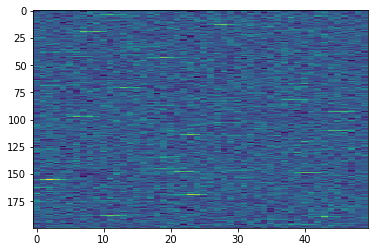

In [106]:
nsamples = 200
npoints = 50

dataset = synthetic_dataset(nsamples, npoints)

plt.figure()
plt.imshow(dataset, aspect='auto')

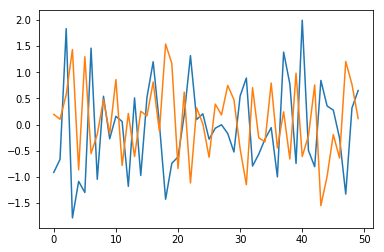

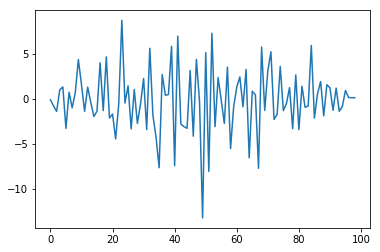

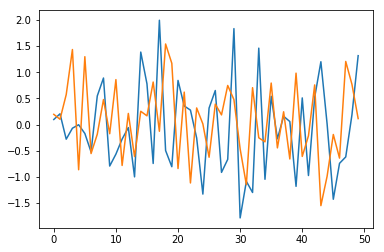

In [107]:
sig1 = dataset[140]
sig2 = dataset[90]

plt.figure()
plt.plot(sig1)
plt.plot(sig2)

plt.figure()
corr = np.correlate(sig1, sig2, 'full')
icorr = np.argmax(corr)
plt.plot(corr)

plt.figure()
plt.plot(np.roll(sig1, -icorr))
plt.plot(sig2)

(200, 1)


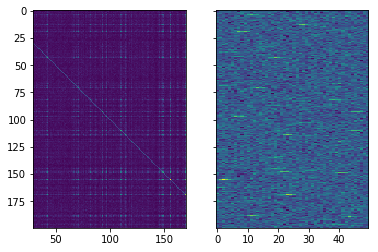

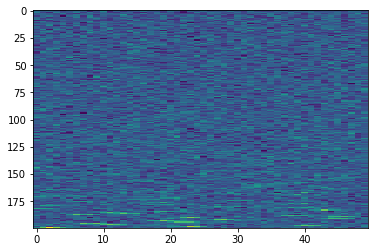

In [108]:
from sklearn.decomposition import KernelPCA


kernel = lambda a, b: np.max(np.correlate(a, b, mode='full'))

corr_matrix = np.empty((nsamples, nsamples))
for irow1 in range(nsamples):
    for irow2 in range(nsamples):
        corr_matrix[irow1, irow2] = kernel(dataset[irow1], dataset[irow2])
        
fig, (col1, col2) = plt.subplots(1, 2, sharey=True)
col1.imshow(corr_matrix)
col2.imshow(dataset, aspect='auto')

model = KernelPCA(n_components=1, kernel=kernel)

model.fit(dataset)

comp = model.transform(dataset)
print(comp.shape)

isort_PCA = np.argsort(comp[:, 0])

plt.figure()
plt.imshow(dataset[isort_PCA], aspect='auto')